In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("VNL2023.csv")


In [5]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [10]:
df.shape


(131, 10)

In [11]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [12]:
df.isna().sum()  

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


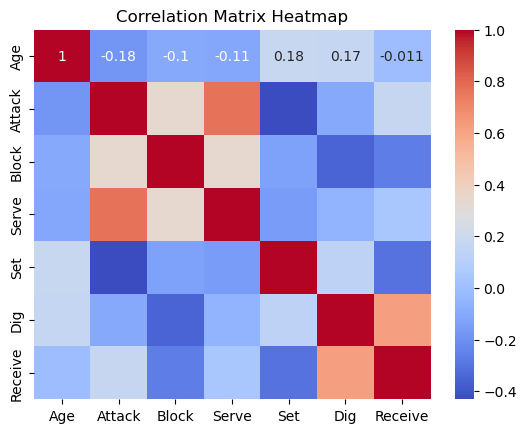

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
position_counts = df['Position'].value_counts()
position_counts.index

Index(['OH', 'MB', 'OP', 'S', 'L'], dtype='object', name='Position')

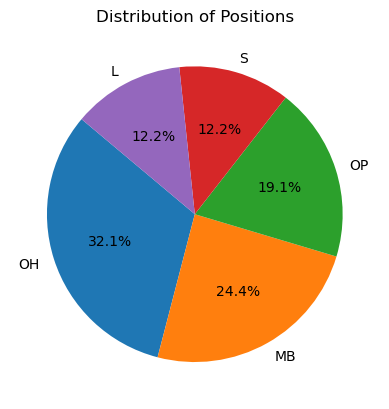

In [19]:
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positions')
plt.show()


In [20]:
avg_attack_by_country = df.groupby('Country')['Attack'].mean()
avg_attack_by_country


Country
Argentina    5.925000
Brazil       5.250000
Bulgaria     5.282500
Canada       5.405714
China        5.093750
Cuba         6.344286
France       6.670000
Germany      4.833750
Iran         4.707778
Italy        5.965000
Japan        6.595000
Nederland    5.880000
Poland       5.807000
Serbia       5.998750
Slovenia     5.961250
USA          4.600000
Name: Attack, dtype: float64

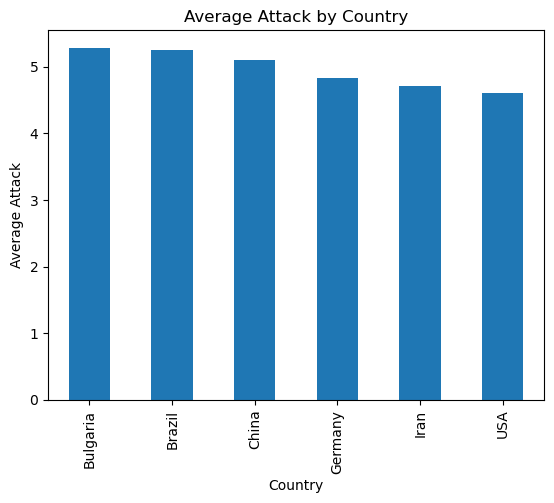

In [22]:
avg_attack_by_country = df.groupby('Country')['Attack'].mean().sort_values(ascending=False).tail(6).plot(kind='bar')
plt.title('Average Attack by Country')
plt.xlabel('Country')
plt.ylabel('Average Attack')
plt.show()

In [23]:
avg_serve_by_age = df.groupby('Age')['Serve'].mean()
avg_serve_by_age.sort_values(ascending=False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [25]:
df.groupby(["Country", "Position"])["Attack"].mean().reset_index().sort_values(by="Attack", ascending=False).head(10)

,Country,Position,Attack
28,Cuba,OP,15.000000
52,Japan,OH,13.665000
8,Brazil,OP,12.460000
48,Italy,OP,12.330000
68,Serbia,OP,12.330000
58,Nederland,OP,10.540000
2,Argentina,OH,10.120000
33,France,OP,9.713333
27,Cuba,OH,9.705000
12,Bulgaria,OH,9.500000


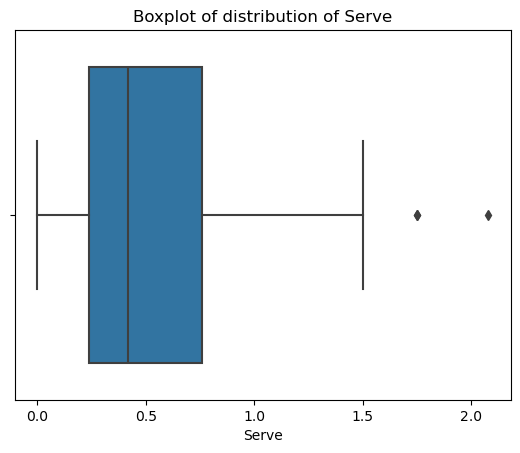

In [27]:
sns.boxplot(x=df["Serve"])
plt.title('Boxplot of distribution of Serve')
plt.xlabel('Serve')
plt.show()

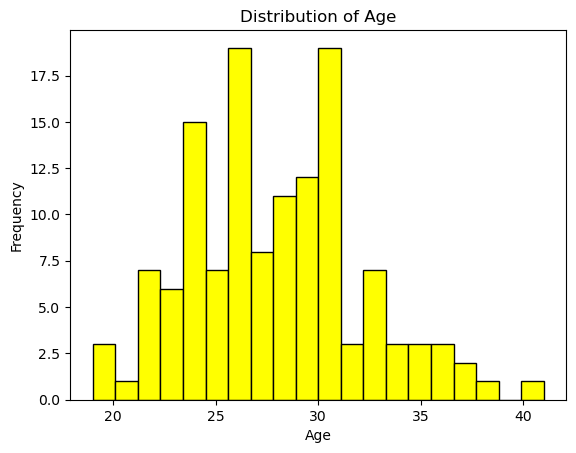

In [29]:
plt.hist(df["Age"], bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

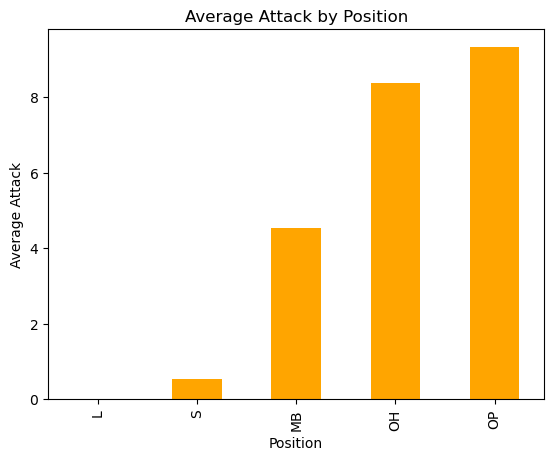

In [34]:
avg_attack_by_position = df.groupby('Position')['Attack'].mean()
avg_attack_by_position.sort_values(ascending=True).plot(kind='bar', color='orange')
plt.title('Average Attack by Position')
plt.xlabel('Position')
plt.ylabel('Average Attack')
plt.show()

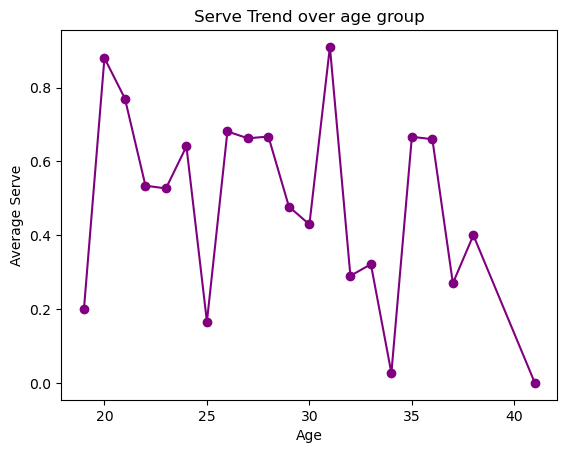

In [37]:
serve_trend_by_age = df.groupby('Age')['Serve'].mean()
serve_trend_by_age.plot(kind='line',marker = "o", linestyle = "-", color='purple')
plt.title('Serve Trend over age group')
plt.xlabel('Age')
plt.ylabel('Average Serve')
plt.show()